In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Looking at our Dataset

In [3]:
df = pd.read_excel('data/no_nans_data.xlsx')

## Data Distribution for some features measuring player offensive stats

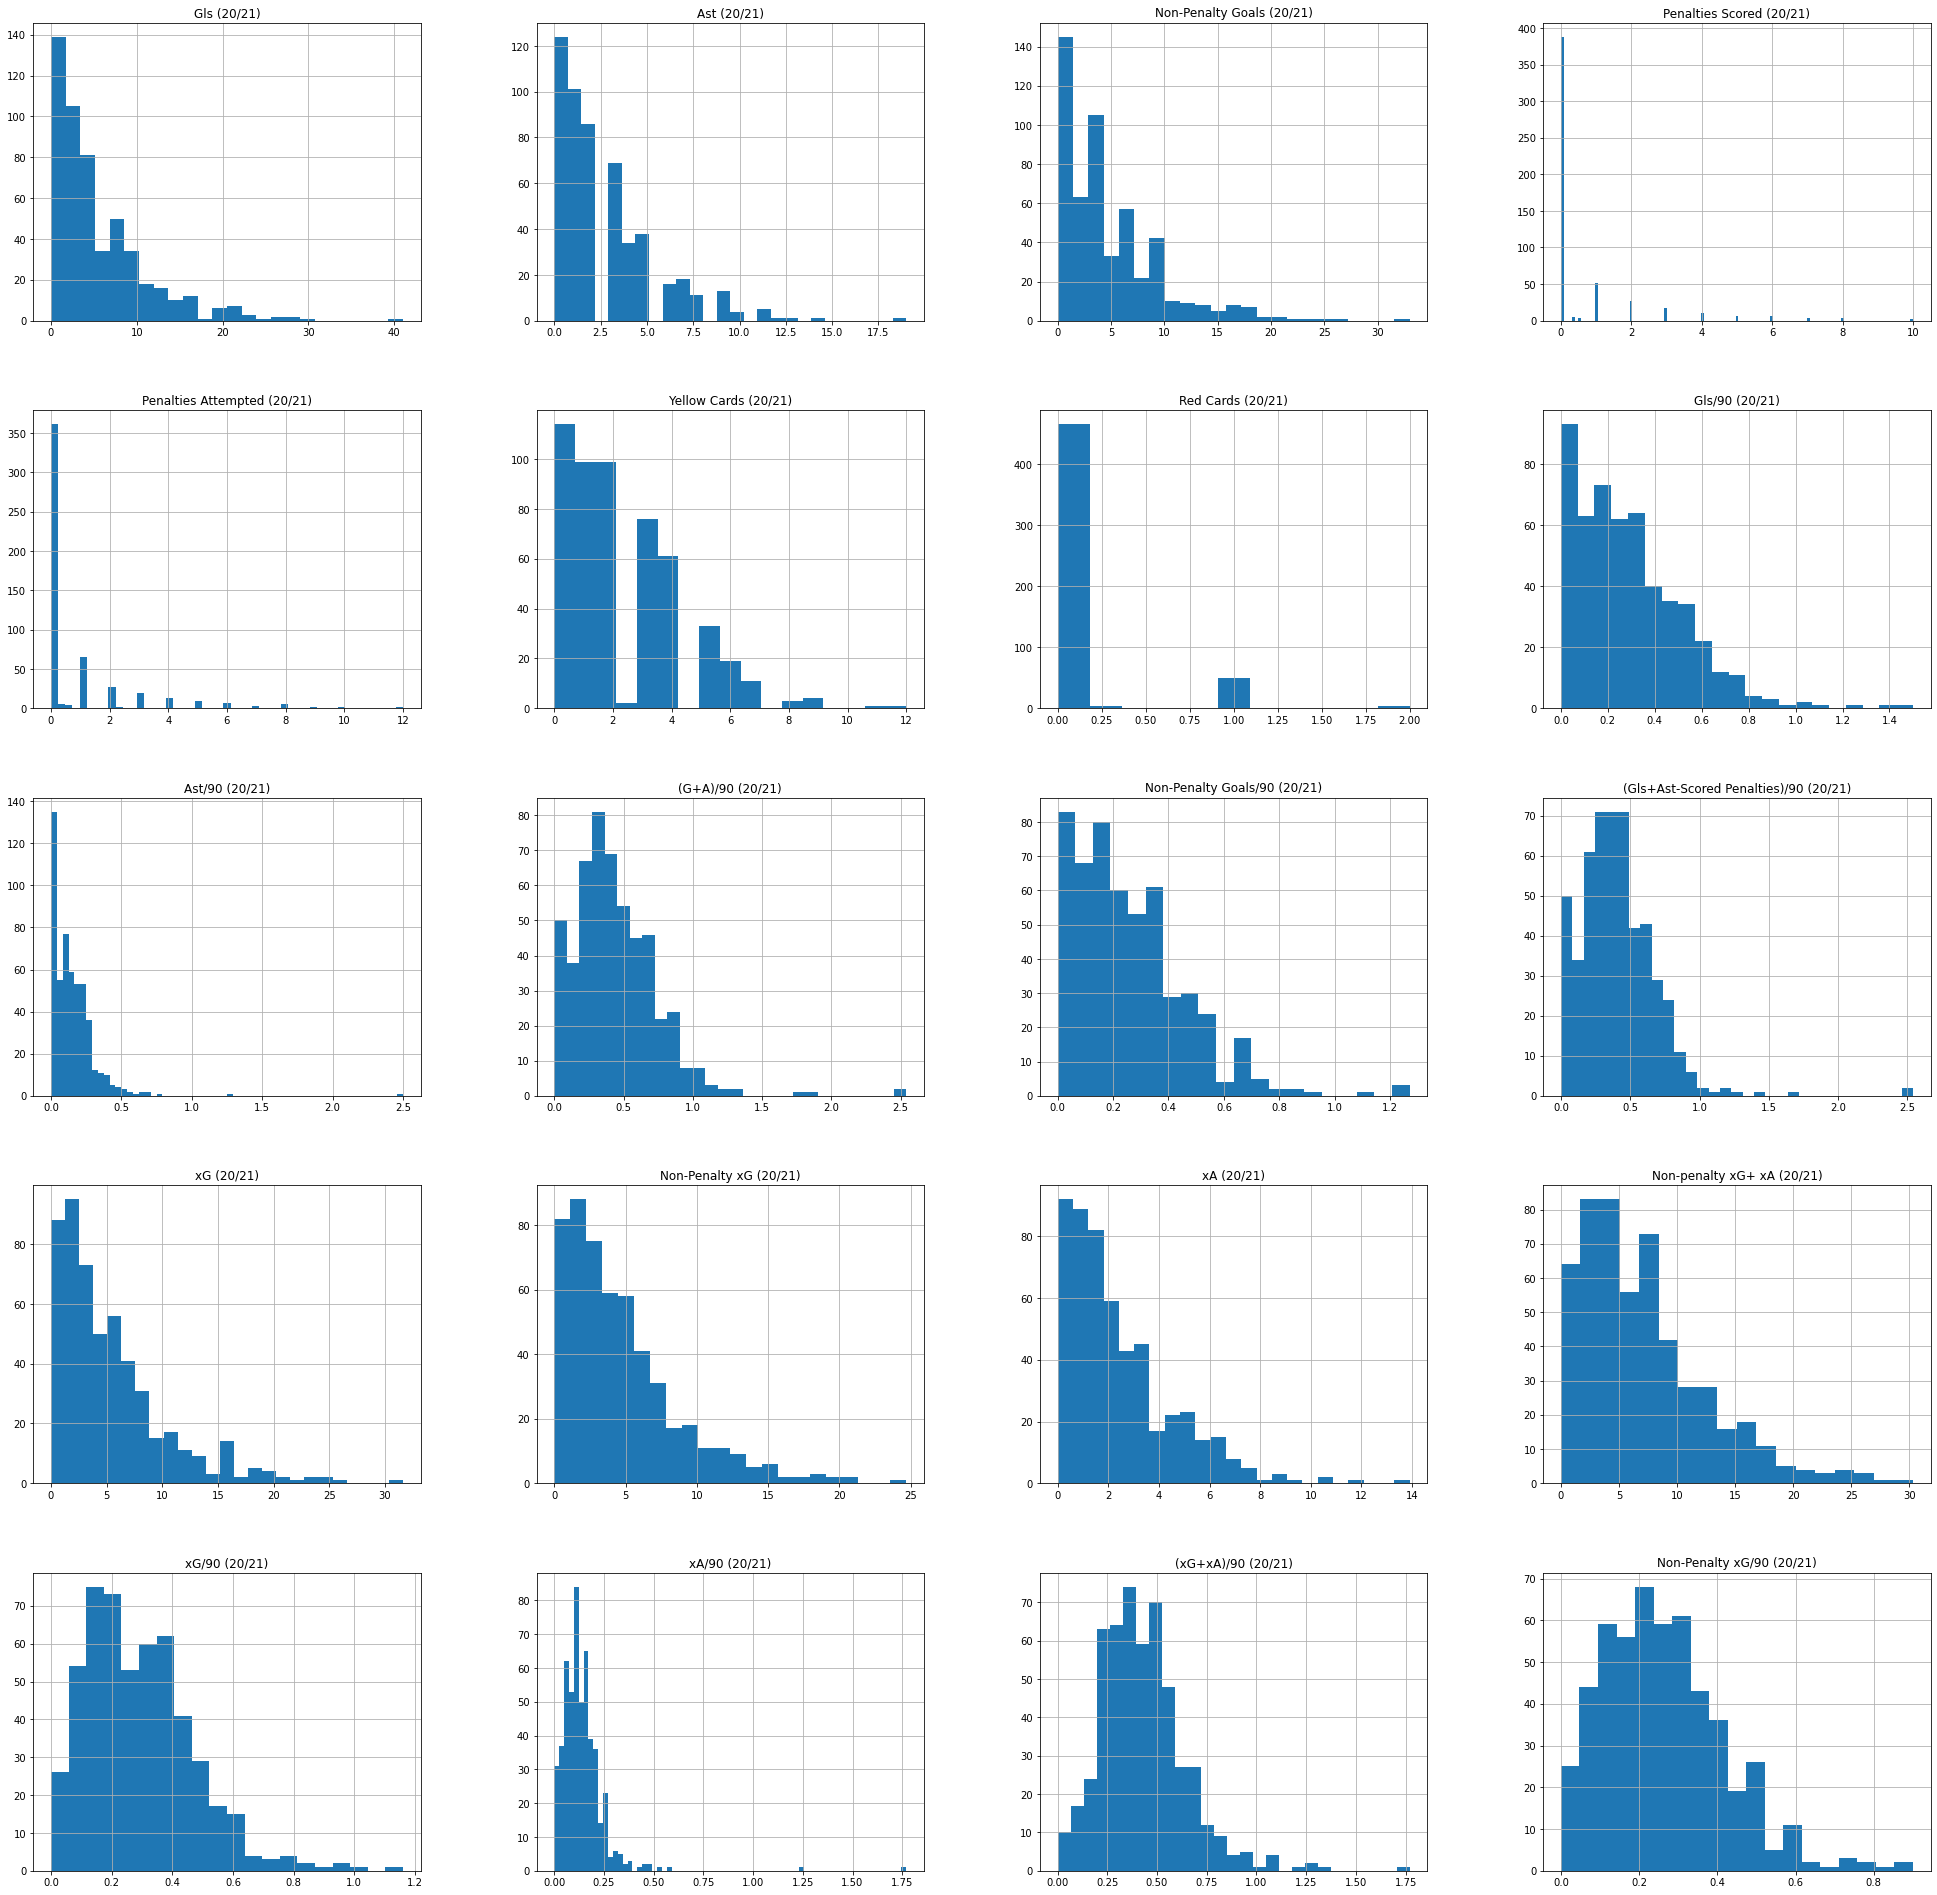

In [4]:
df[df['Position']=='attack'].iloc[:,12:32].hist(figsize=(34, 34), bins='auto');

## Separating player rows by position

In [5]:
attackers = df[df['Position']=='attack']
midfielders = df[df['Position']=='midfield']
defenders = df[df['Position']=='Defender']

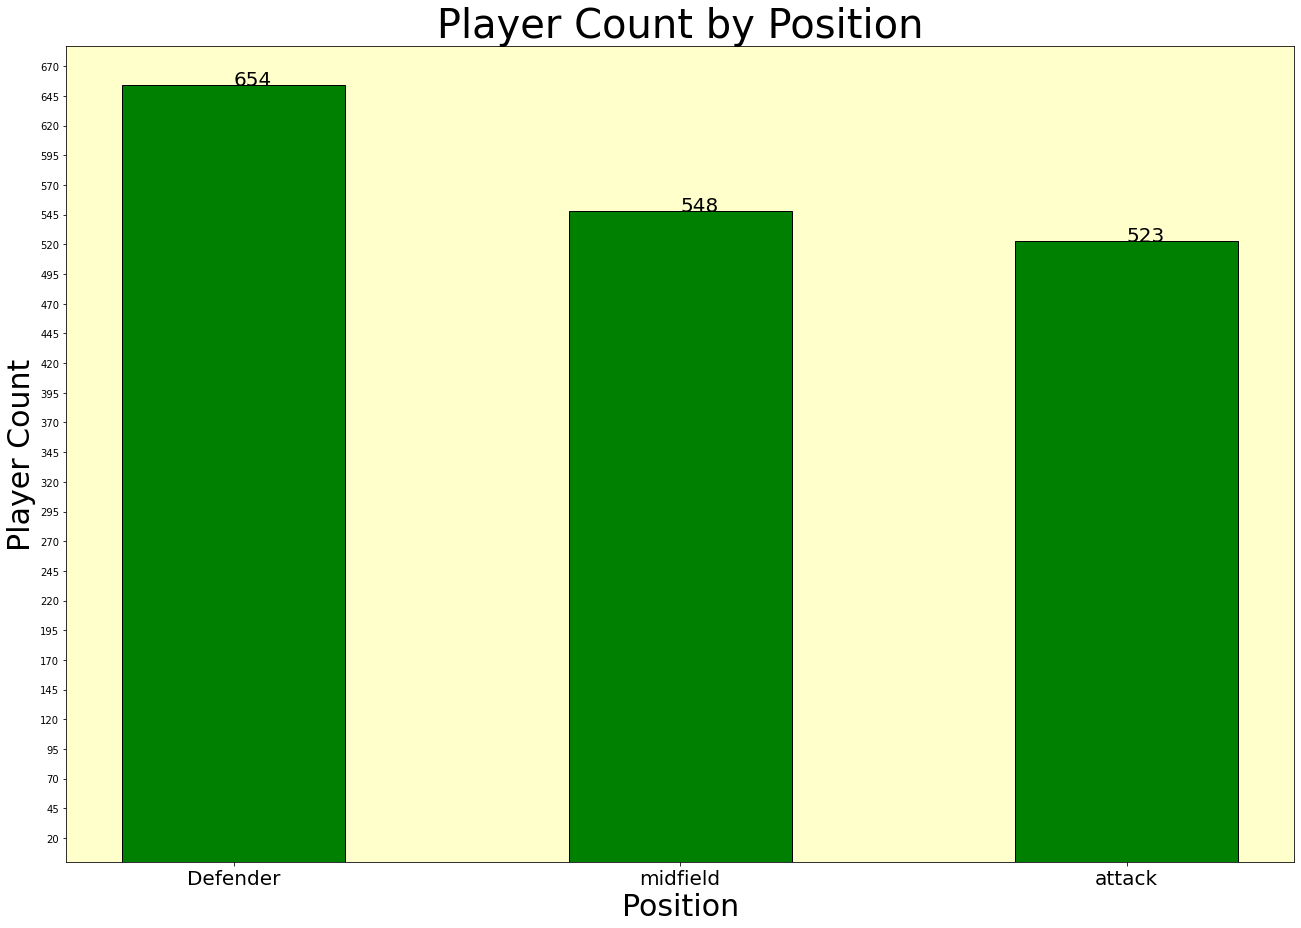

In [26]:
fig, ax = plt.subplots(figsize=(22,15))

x_labels = list(dict(df['Position'].value_counts()).keys())
x_ticks = list(range(0,len(x_labels)))
y_values = [a for a in df['Position'].value_counts()]
y_ticks = list(range(20,max(y_values)+30,25))


ax.bar(x_ticks,y_values,0.5,color='green',edgecolor='black')


def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i],fontsize=20)

addlabels(x_ticks,y_values)
ax.set_yticks(y_ticks)
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels,fontsize=20)
ax.set_title('Player Count by Position',fontsize=40)
ax.set_xlabel('Position',fontsize=30)
ax.set_ylabel('Player Count',fontsize=30)
ax.set_facecolor('xkcd:ivory');

## Illustrating data gathered from FBREF.com

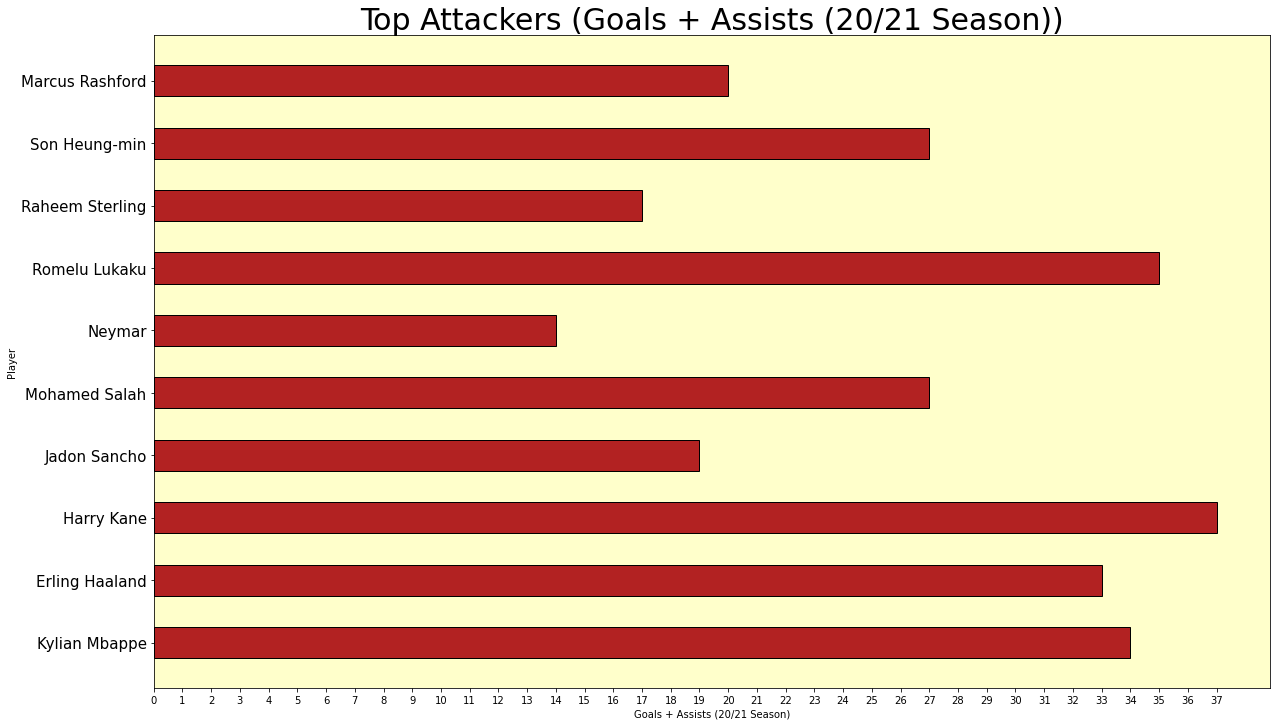

In [6]:
fig, ax = plt.subplots(figsize=(20,12))

y_labels = [a for a in attackers['Player'][:10]]
y_ticks = list(range(1,(len(y_labels)+1)))
x_values = [a + b for a,b in zip(attackers['Gls (20/21)'][:10],attackers['Ast (20/21)'][:10])]
x_ticks = list(range(0,int(max(x_values)+1)))


ax.barh(y_ticks,x_values,0.5,color = 'firebrick',edgecolor='black')


ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels,fontsize=15)
ax.set_ylabel('Player')
ax.set_xlabel('Goals + Assists (20/21 Season)')
ax.set_title('Top Attackers (Goals + Assists (20/21 Season))',fontsize=30)
ax.set_facecolor('xkcd:ivory');

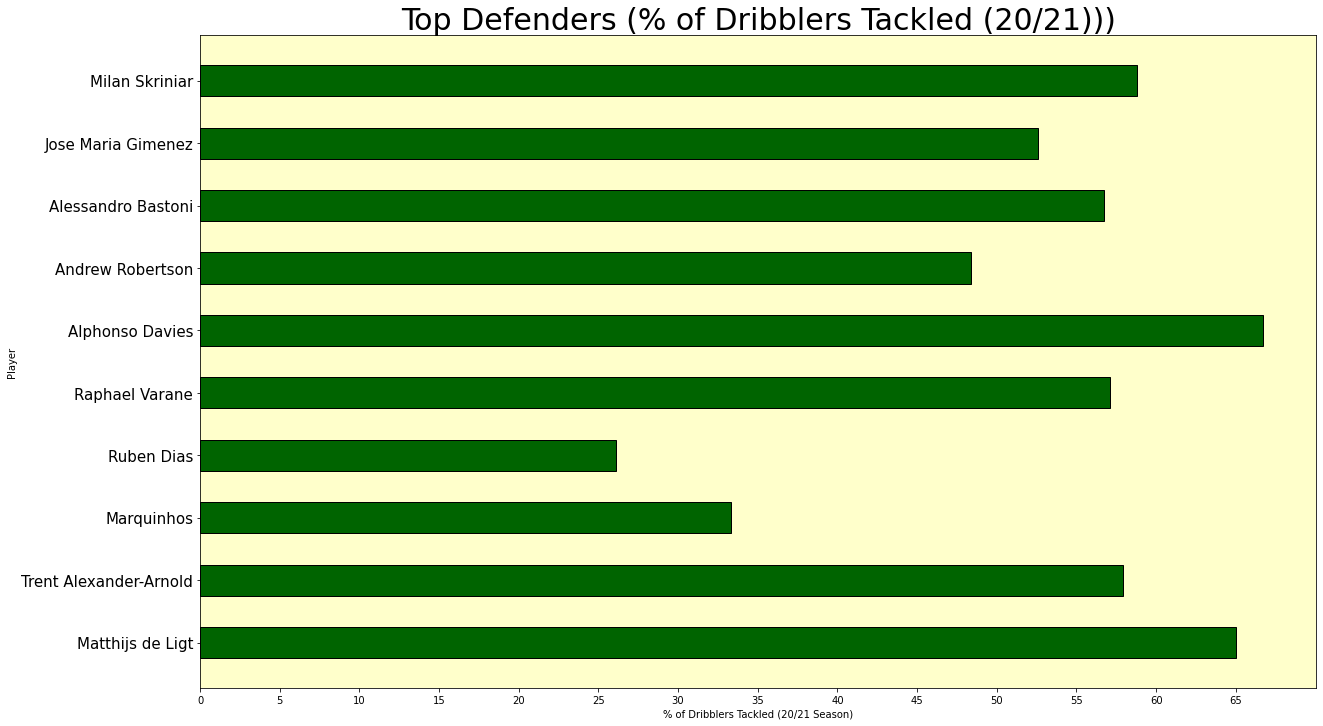

In [7]:
fig, ax = plt.subplots(figsize=(20,12))

y_labels = [a for a in defenders['Player'][:10]]
y_ticks = list(range(1,(len(y_labels)+1)))
x_values = [a for a in defenders['% of Dribblers Tackled (20/21)'][:10]]
x_ticks = list(range(0,int(max(x_values)+1),5))

ax.barh(y_ticks,x_values,0.5,color='darkgreen',edgecolor='black')

ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels,fontsize=15)
ax.set_ylabel('Player')
ax.set_xlabel('% of Dribblers Tackled (20/21 Season)')
ax.set_title('Top Defenders (% of Dribblers Tackled (20/21)))',fontsize=30)
ax.set_facecolor('xkcd:ivory');

## Illustrating data gathered from transfermarkt.co.uk

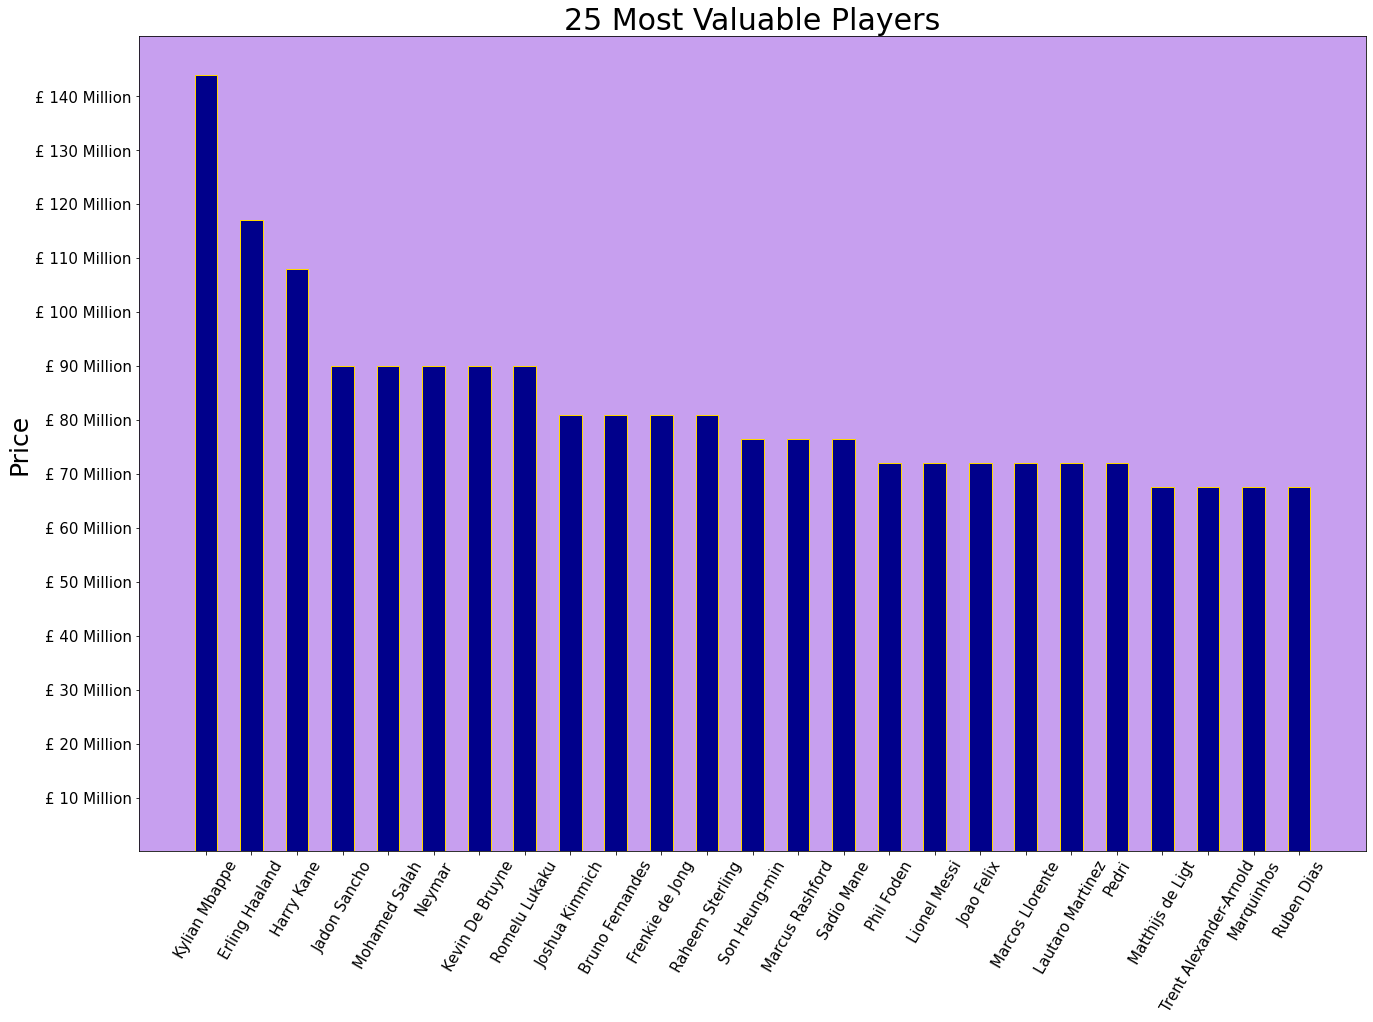

In [8]:
fig, ax = plt.subplots(figsize=(22,15))

x_labels = [a for a in df['Player'][:25]]
x_ticks = range(0,(len(x_labels)))
y_values = [a for a in df['Value'][:25]]
y_ticks = list(range(10000000,(max(df['Value'])+5000000),10000000))
y_ticklabels = [f'£ {int(a/1000000)} Million' for a in y_ticks]


ax.bar(x_ticks,y_values,0.5,edgecolor='gold',color='darkblue')


ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels,rotation=60,fontsize=15)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticklabels,fontsize=15)
ax.set_ylabel('Price',fontsize=25)
ax.set_title('25 Most Valuable Players',fontsize=30)
ax.set_facecolor('xkcd:lavender');

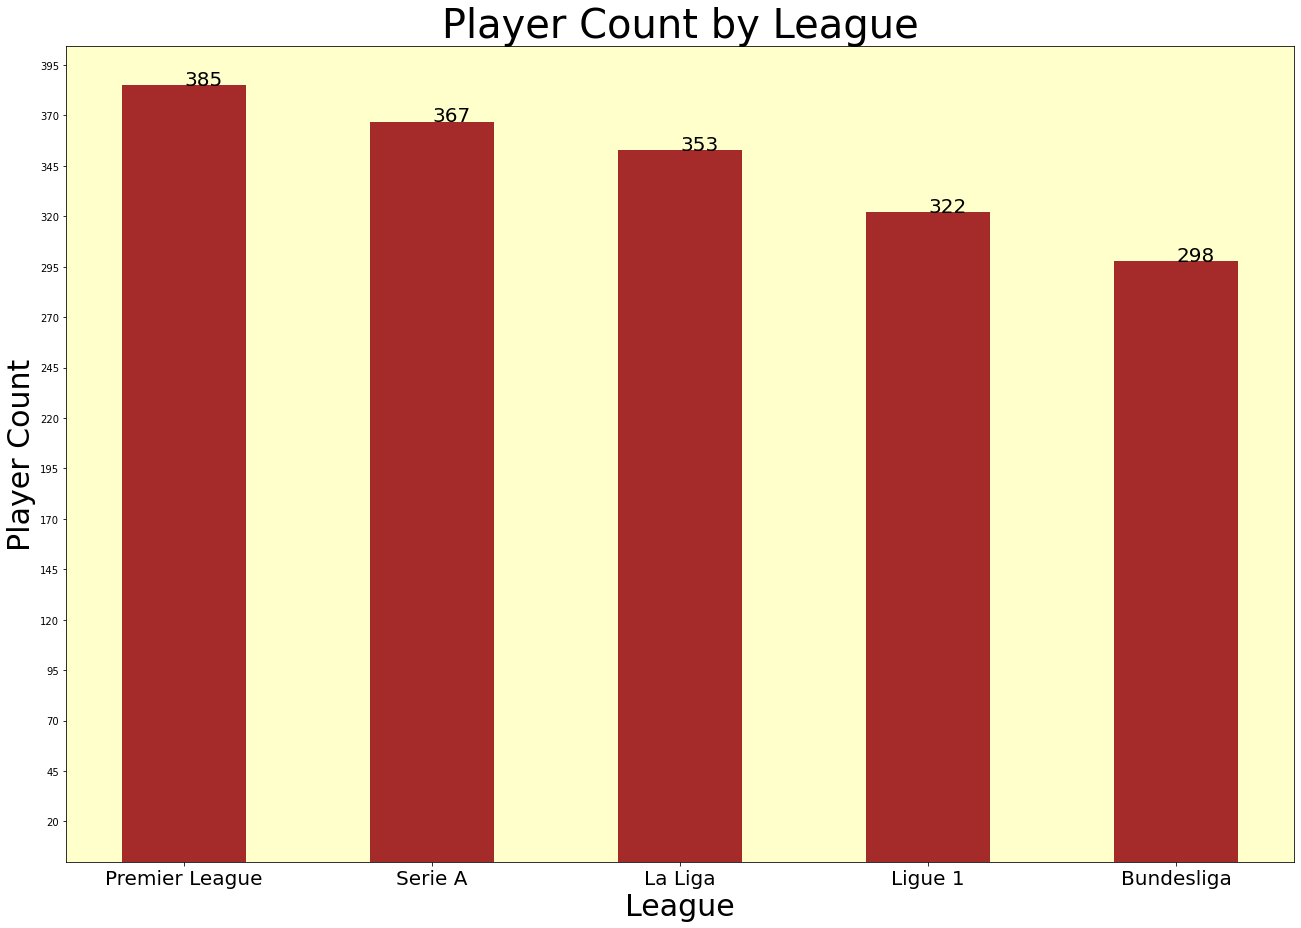

In [9]:
fig, ax = plt.subplots(figsize=(22,15))

x_labels = list(dict(df['League'].value_counts()).keys())
x_ticks = list(range(0,len(x_labels)))
y_values = [a for a in df['League'].value_counts()]
y_ticks = list(range(20,max(y_values)+30,25))


ax.bar(x_ticks,y_values,0.5,color='brown')


def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i],fontsize=20)

addlabels(x_ticks,y_values)
ax.set_yticks(y_ticks)
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels,fontsize=20)
ax.set_title('Player Count by League',fontsize=40)
ax.set_xlabel('League',fontsize=30)
ax.set_ylabel('Player Count',fontsize=30)
ax.set_facecolor('xkcd:ivory');

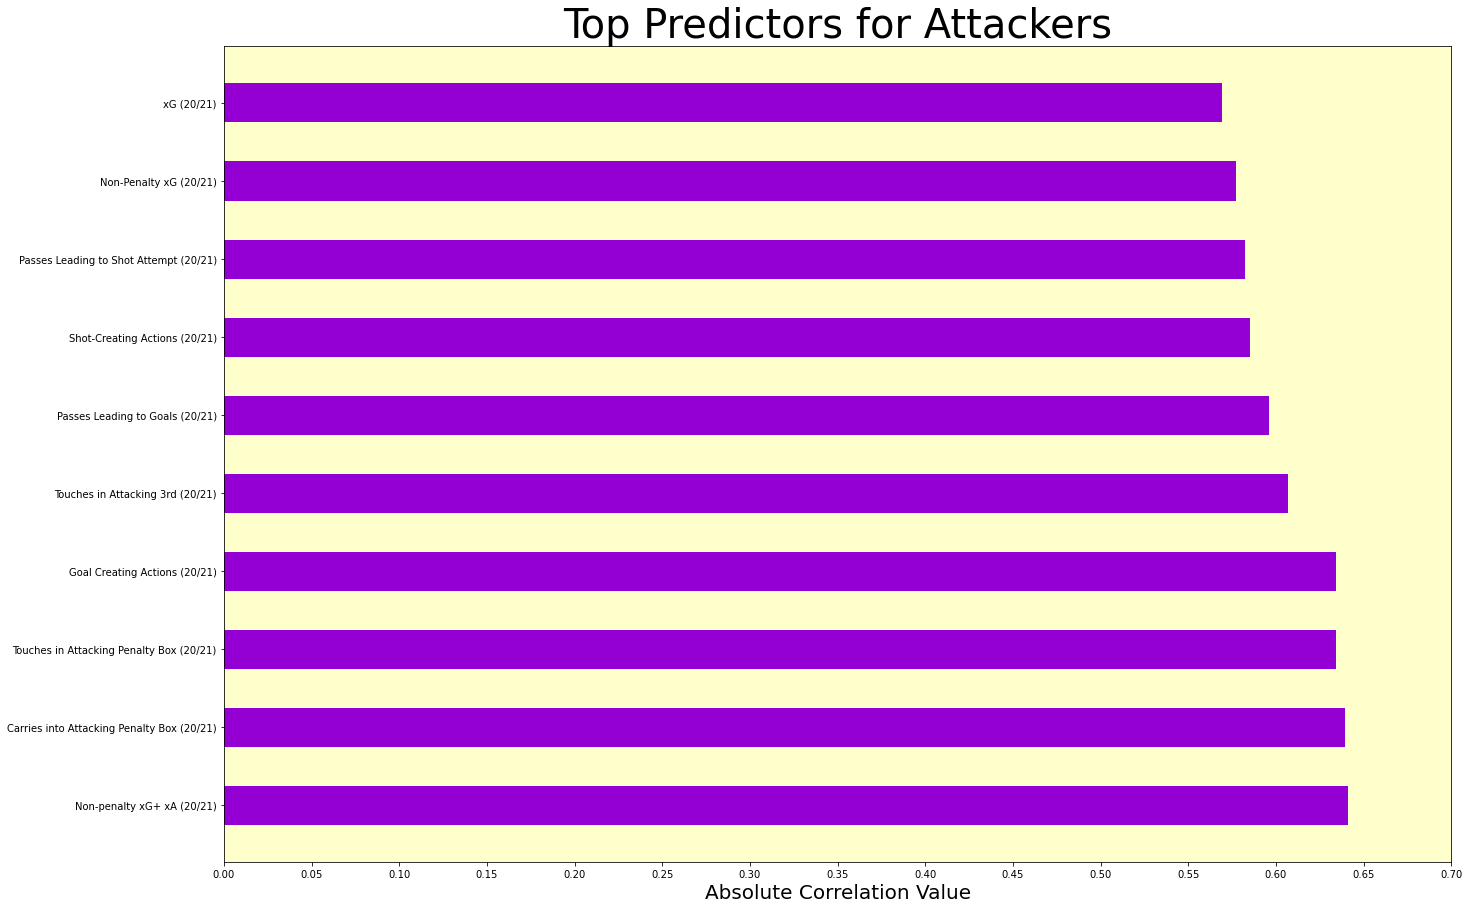

In [15]:
fig, ax = plt.subplots(figsize=(22,15))

y_labels = list(dict(abs(attackers.corr()['Value'].sort_values(ascending=False))[1:11]).keys())
y_ticks = list(range(0,len(y_labels)))
x_values = list(dict(abs(attackers.corr()['Value'].sort_values(ascending=False))[1:11]).values())
x_ticks = [a/100 for a in list(range(0,(int(max(x_values)*100)+10),5))]

ax.barh(y_ticks,x_values,0.5,color='darkviolet')

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_xticks(x_ticks)
ax.set_xlabel('Absolute Correlation Value',fontsize=20)
ax.set_title('Top Predictors for Attackers',fontsize=40)
ax.set_facecolor('xkcd:ivory');

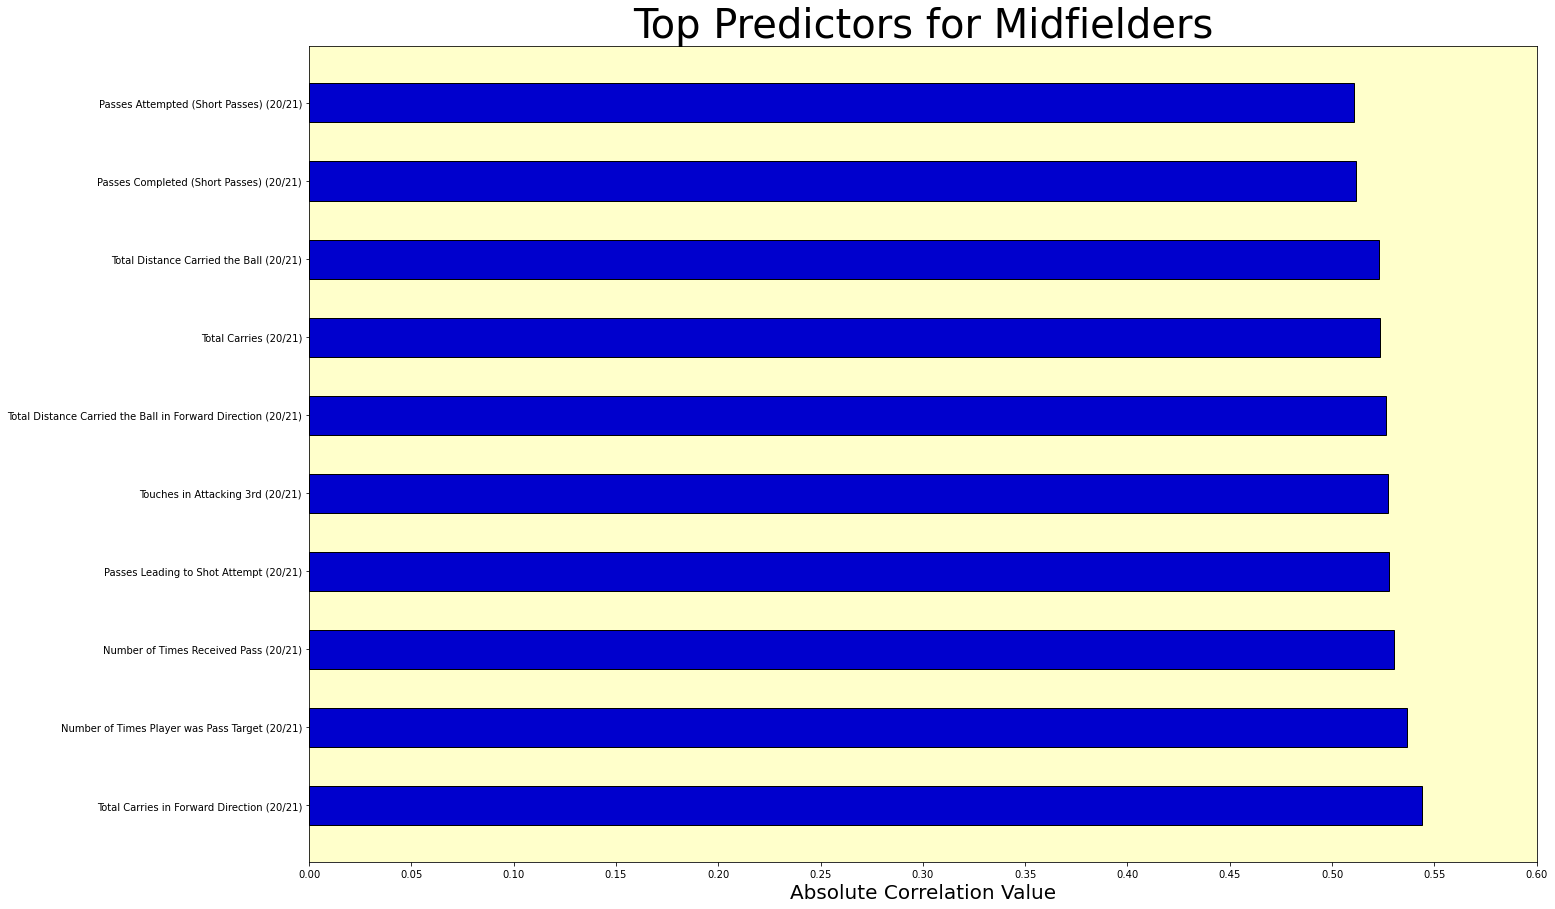

In [16]:
fig, ax = plt.subplots(figsize=(22,15))

y_labels = list(dict(abs(midfielders.corr()['Value'].sort_values(ascending=False))[1:11]).keys())
y_ticks = list(range(0,len(y_labels)))
x_values = list(dict(abs(midfielders.corr()['Value'].sort_values(ascending=False))[1:11]).values())
x_ticks = [a/100 for a in list(range(0,(int(max(x_values)*100)+10),5))]

ax.barh(y_ticks,x_values,0.5,color='mediumblue',edgecolor='black')

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_xticks(x_ticks)
ax.set_xlabel('Absolute Correlation Value',fontsize=20)
ax.set_title('Top Predictors for Midfielders',fontsize=40)
ax.set_facecolor('xkcd:ivory');

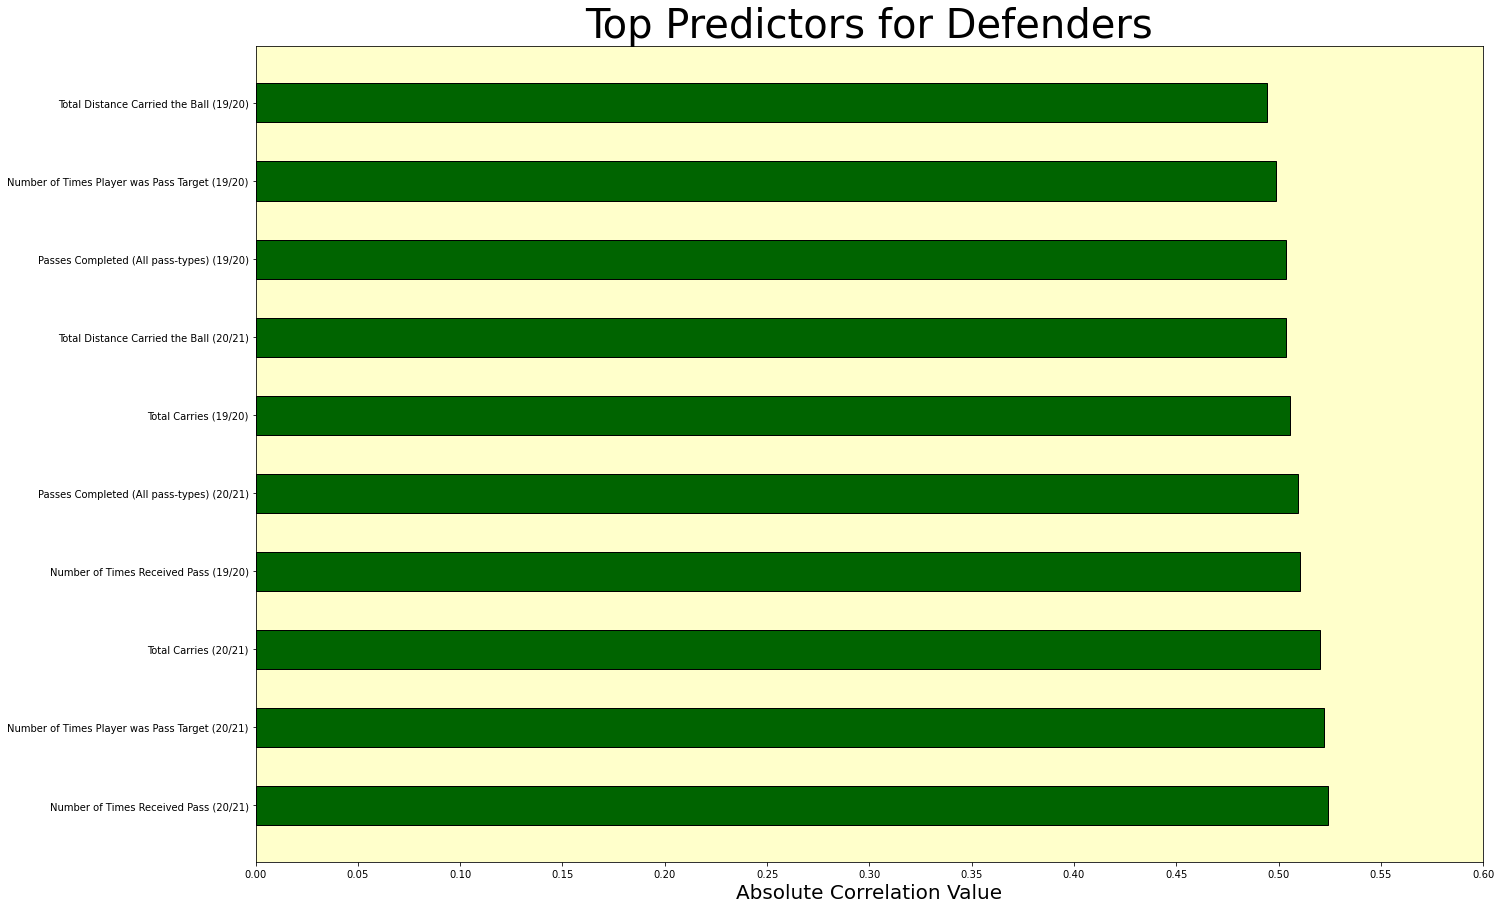

In [17]:
fig, ax = plt.subplots(figsize=(22,15))

y_labels = list(dict(abs(defenders.corr()['Value'].sort_values(ascending=False))[1:11]).keys())
y_ticks = list(range(0,len(y_labels)))
x_values = list(dict(abs(defenders.corr()['Value'].sort_values(ascending=False))[1:11]).values())
x_ticks = [a/100 for a in list(range(0,(int(max(x_values)*100)+10),5))]

ax.barh(y_ticks,x_values,0.5,color='darkgreen',edgecolor='black')

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_xticks(x_ticks)
ax.set_xlabel('Absolute Correlation Value',fontsize=20)
ax.set_title('Top Predictors for Defenders',fontsize=40)
ax.set_facecolor('xkcd:ivory');

## Model Performances (Refer to notebooks in [modeling folder](notebooks/modeling) for information on how these results were gathered)

In [13]:
att_results = {'Linear Regression':13996397.72,
               'Lasso Regression':16441726.52,
               'Ridge Regression':12055883.60,
               'DecisionTree':18420271.01,
               'RandomForest':14117633.44,
               'GradientBoost':14609191.72,
               'AdaBoost':15910789.53,
               'SupportVectorRegressor':23554339.01}

mid_results = {'Linear Regression':16909509.38,
               'Lasso Regression':13215631.17,
               'Ridge Regression':13572709.96,
               'DecisionTree':13637991.79,
               'RandomForest':11695876.12,
               'GradientBoost':12504721.04,
               'AdaBoost':12037465.50,
               'SupportVectorRegressor':14107116.01}

def_results = {'Linear Regression':10027544.14,
               'Lasso Regression':11460855.97,
               'Ridge Regression':10880051.20,
               'DecisionTree':12187829.81,
               'RandomForest':9507275.25,
               'GradientBoost':9513221.96,
               'AdaBoost':9658278.87,
               'SupportVectorRegressor':13332388.56}

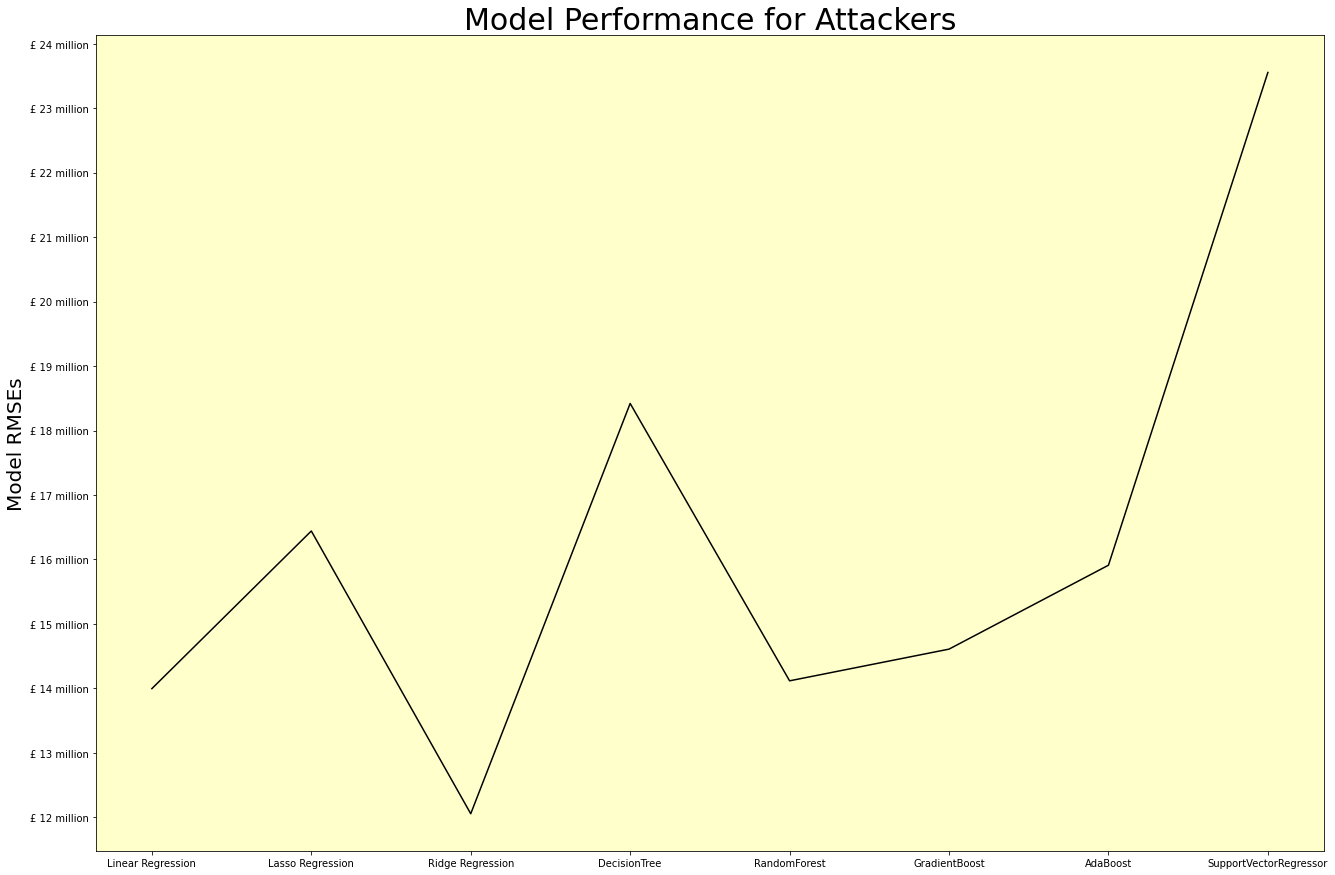

In [22]:
fig, ax = plt.subplots(figsize=(22,15))


x_values = list(att_results.keys())

y_values = list(att_results.values())
y_ticks = list(range(12000000,int(max(y_values))+1000000,1000000))
y_labels =  [f'£ {int(a/1000000)} million' for a in y_ticks]


ax.plot(x_values,y_values,color='black')

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_title('Model Performance for Attackers',fontsize=30)
ax.set_ylabel('Model RMSEs',fontsize=20)
ax.set_facecolor('xkcd:ivory');

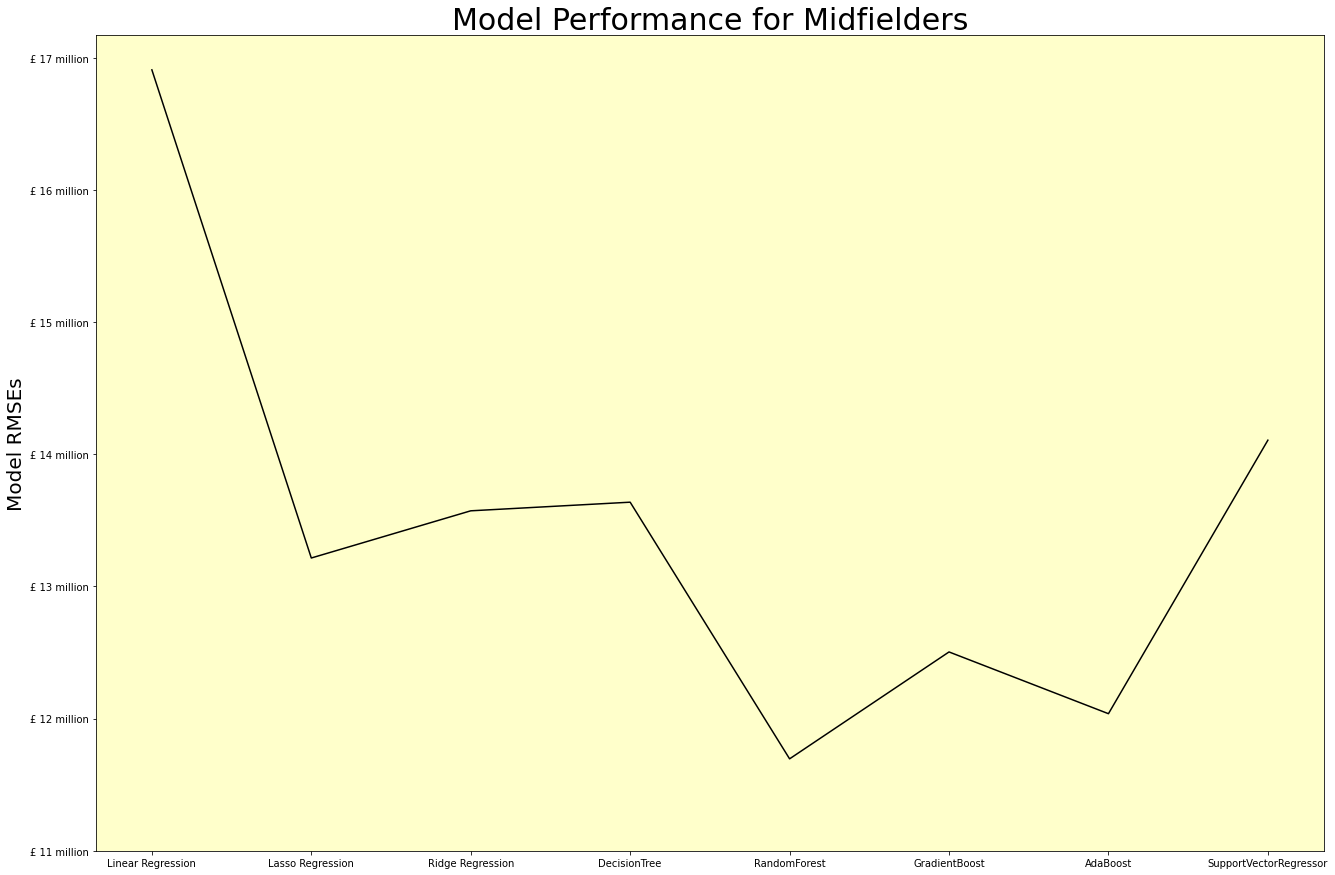

In [24]:
fig, ax = plt.subplots(figsize=(22,15))


x_values = list(mid_results.keys())

y_values = list(mid_results.values())
y_ticks = list(range(11000000,int(max(y_values))+1000000,1000000))
y_labels =  [f'£ {int(a/1000000)} million' for a in y_ticks]


ax.plot(x_values,y_values,color='black')

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_title('Model Performance for Midfielders',fontsize=30)
ax.set_ylabel('Model RMSEs',fontsize=20)
ax.set_facecolor('xkcd:ivory');

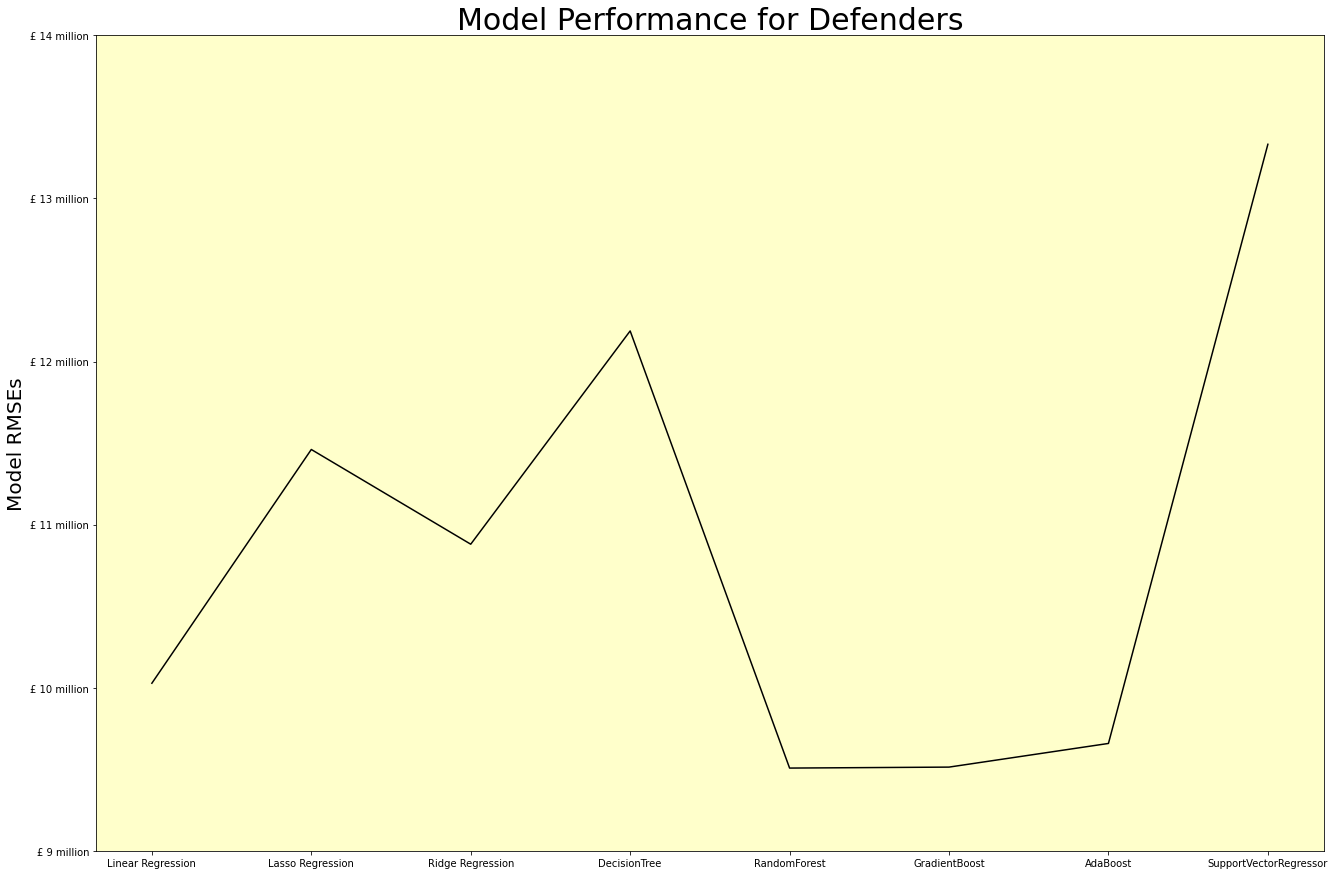

In [25]:
fig, ax = plt.subplots(figsize=(22,15))


x_values = list(def_results.keys())

y_values = list(def_results.values())
y_ticks = list(range(9000000,int(max(y_values))+1000000,1000000))
y_labels =  [f'£ {int(a/1000000)} million' for a in y_ticks]


ax.plot(x_values,y_values,color='black')

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_title('Model Performance for Defenders',fontsize=30)
ax.set_ylabel('Model RMSEs',fontsize=20)
ax.set_facecolor('xkcd:ivory');

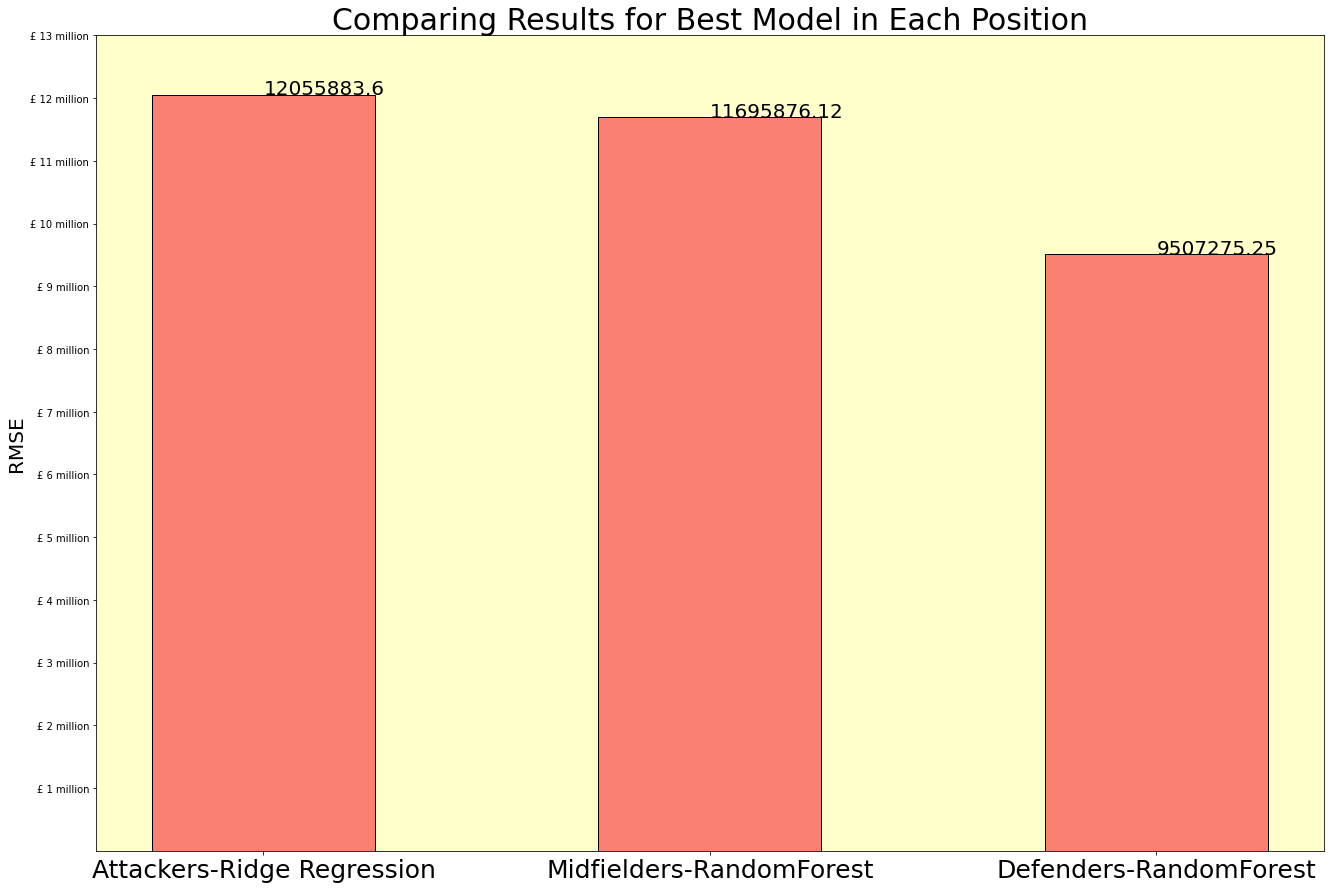

In [28]:
att_sorted = {k: v for k, v in sorted(att_results.items(), key=lambda item: item[1])}
mid_sorted = {k: v for k, v in sorted(mid_results.items(), key=lambda item: item[1])}
def_sorted = {k: v for k, v in sorted(def_results.items(), key=lambda item: item[1])}

attackers_best = {list(att_sorted.keys())[0]:list(att_sorted.values())[0]}
midfielders_best = {list(mid_sorted.keys())[0]:list(mid_sorted.values())[0]}
defenders_best = {list(def_sorted.keys())[0]:list(def_sorted.values())[0]}

fig, ax = plt.subplots(figsize=(22,15))

y_values = list(attackers_best.values())[0],list(midfielders_best.values())[0],list(defenders_best.values())[0]
model_names = list(attackers_best.keys())[0],list(midfielders_best.keys())[0],list(defenders_best.keys())[0]
x_labels = [f'Attackers-{model_names[0]}',f'Midfielders-{model_names[1]}',f'Defenders-{model_names[2]}']
x_ticks = list(range(0,len(x_labels)))
y_ticks = list(range(1000000,int(max(y_values)+1000000),1000000))
y_labels = [f'£ {int(a/1000000)} million' for a in y_ticks]



ax.bar(x_ticks,y_values,0.5,color='salmon',edgecolor='black')

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i],fontsize=20)

addlabels(x_ticks,y_values)


ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels,fontsize=25)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_title('Comparing Results for Best Model in Each Position',fontsize=30)
ax.set_ylabel('RMSE',fontsize=20)
ax.set_facecolor('xkcd:ivory');